In [424]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [425]:
df = pd.read_csv('Iris.csv')
td = pd.read_csv('Iris.csv')


In [426]:
df.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [427]:
df = df.drop('class', axis=1)
df.head()


,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [452]:
# valor Minino da classe Sepallength / valor Maximo da classe Sepallength
df["sepallength"].min() , df["sepallength"].max()


(4.3, 7.9)

In [454]:
# valor Minimo da classe Sepalwidth /valor Maximo da classe Sepalwidth
df["sepalwidth"].min() ,df["sepalwidth"].max()


(2.0, 4.4)

In [453]:
# valor Minimo da classe petallength /  valor Maximo da classe petallength
df["petallength"].min() , df["petallength"].max()


(1.0, 6.9)

In [456]:
# valor Minimo da classe petalwidth /valor Maximo da classe petalwidth
df["petalwidth"].min() ,df["petalwidth"].max()


(0.1, 2.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x170d13eaaa0>,
 'caps': [<matplotlib.lines.Line2D at 0x170d13eb040>,
 'boxes': [<matplotlib.lines.Line2D at 0x170d13ea7d0>,
 'medians': [<matplotlib.lines.Line2D at 0x170d13eb5e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x170d13eb8b0>,
 'means': []}

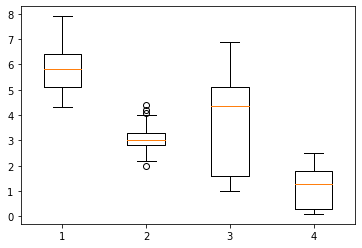

In [436]:
plt.boxplot(df)


{'whiskers': [<matplotlib.lines.Line2D at 0x170d1458f40>,
 'caps': [<matplotlib.lines.Line2D at 0x170d14594e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x170d1458d90>],
 'medians': [<matplotlib.lines.Line2D at 0x170d1459a80>],
 'fliers': [<matplotlib.lines.Line2D at 0x170d1459d50>],
 'means': []}

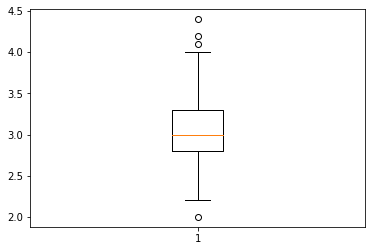

In [437]:
plt.boxplot(df.sepalwidth)


In [438]:
Q1 = df.sepalwidth.quantile(0.25)
Q3 = df.sepalwidth.quantile(0.75)
Q1, Q3


(2.8, 3.3)

In [439]:
IQR = Q3-Q1
IQR


0.5

In [440]:
LowrL = Q1-1.5*IQR
UperL = Q3+1.5*IQR
LowrL, UperL


(2.05, 4.05)

In [441]:
df[(df.sepalwidth < LowrL) | (df.sepalwidth > UperL)]


,sepallength,sepalwidth,petallength,petalwidth
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [442]:
df2 = df[(df.sepalwidth > LowrL) & (df.sepalwidth < UperL)]
df2.shape



(146, 4)

In [443]:
td2 = td[(td.sepalwidth > LowrL) & (td.sepalwidth < UperL)]

In [444]:
wss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, init="k-means++").fit(df)
    wss.append(k_means.inertia_)


In [445]:
wss


[680.8244,
 152.36870647733906,
 78.94084142614601,
 57.34540931571816,
 46.56163015873016,
 38.95373036498036,
 34.27727508361204,
 29.88917890442891,
 28.341089283242095,
 25.82160115864528]

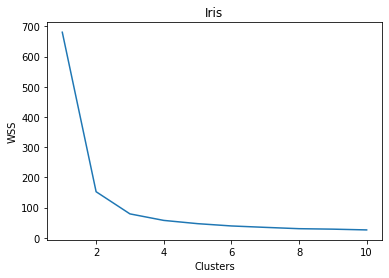

In [446]:
plt.plot(range(1, 11), wss)
plt.title("Iris")
plt.xlabel("Clusters")
plt.ylabel("WSS")
plt.show()


In [447]:
#
def valordeSSe(clusters):
    sse = 0.0
    for c in clusters:
        tt = 0.0
        c_centroid = c.centroid.coords
        for po in c.points:
            tt += reduce(lambda x, y: x + pow((po.coords[y]- c.centroid.coords[y]), 2),
                 range(po.n), 0.0)
        sse += tt
    return sse       


In [448]:
k_means=KMeans(n_clusters=3,random_state=0).fit(df)
#print(valordeSSe(k_means.fit_predict(df)))

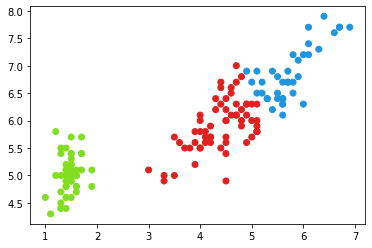

In [449]:
k_means=KMeans(n_clusters=3,random_state=0).fit(df)
colors = ['#DF2020', '#81DF20', '#2095DF']
k_means.labels_
df['cluster'] = k_means.fit_predict(df)
centroids=k_means.cluster_centers_
cen_x=[i[0]for i in centroids]
cen_y=[i[1]for i in centroids]
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})
plt.scatter(df.petallength,df.sepallength,c=df.c)

In [450]:
k_means1=KMeans(n_clusters=3,random_state=0).fit(df2)
td2['Agrupamento']=k_means1.labels_
td2.to_csv("nomeDoCSV.csv")

C:\Users\Quebec\AppData\Local\Temp\ipykernel_11244\4041186035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td2['Agrupamento']=k_means1.labels_


In [451]:

td['Agrupamento']=k_means.labels_
td.to_csv("nomeDoCSV2.csv")